In [532]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import  datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering

In [533]:
n_samples = 500

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# Set up cluster parameters
default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

# Update parameters with dataset-specific values
params = default_base.copy()
params.update(
    {
        "eps": 0.15,    
        "n_neighbors": 2,
        "min_samples": 7,
        "xi": 0.1,
        "min_cluster_size": 0.2,
    }
)

X, y = aniso

# Normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# Estimate bandwidth for mean shift
# bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

# Connectivity matrix for structured Ward
connectivity = kneighbors_graph(X, n_neighbors=params["n_neighbors"], include_self=False)
# Make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

In [534]:
clusterer = mixture.GaussianMixture(
    n_components=3,
    covariance_type="full",
    random_state=params["random_state"],
)

cluster = AgglomerativeClustering(n_clusters=3)

clusterer.fit(X)

y_pred = clusterer.predict(X)

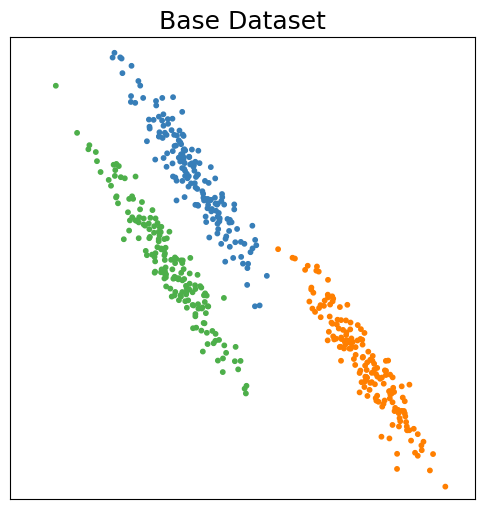

In [535]:
plt.figure(figsize=(6, 6))

colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                ]
            ),
            int(max(y_pred) + 1),
        )
    )
)
# Add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())


plt.title("Base Dataset", size=18)
p1= plt.gcf()

plt.show()

In [536]:
n_outliers = 20
# Add impulse noise to X_normalized

# Add impulse noise to X_normalized
X_noisy = np.copy(X)
outlier_indices = np.random.choice(range(33), size=n_outliers, replace=False)
X_noisy[outlier_indices] = np.random.uniform(low=X_noisy.min(), high = X_noisy.max(), size=(n_outliers, X_noisy.shape[1])) 



In [537]:


current_seed = np.random.get_state()
print(current_seed)


('MT19937', array([ 871469549, 2651059971, 3516714043, 2409262895, 1484955119,
       2801380009, 2560453613,  281862043, 1850689428, 1881146410,
       2591153795, 3771558931,  431709404, 3449666023, 2510175447,
        593174786, 2189960403, 4203015788, 1071654132,  803466724,
       3047921179, 1241628357,  647464513, 4210255662, 1538663561,
       2999951832, 2914715403,  815452517,  993341803, 3732094580,
       1879751500, 3243191619, 2185916499, 4204012980, 3714323868,
          1234155, 2054735282, 1088464530, 3376304256, 3112057914,
       1358805034, 2099269478, 2097740638, 1546416183, 3051456415,
       3912730073, 3400848544, 2819622987, 1420829894, 3333895428,
       3761572900,  831817778, 1864068444, 3090056787, 2450427522,
       1730070193, 2331483907, 2792598395, 1533709474, 2100336513,
       2613306782,  600541690,   31778018, 3804703499,  791126951,
        963605135, 2679823535,   91691444,  173268109, 1734958022,
       3191621370, 4238078336,  554625520, 2234474

In [538]:

clusterer.fit(X_noisy)

y_pred = clusterer.predict(X_noisy)

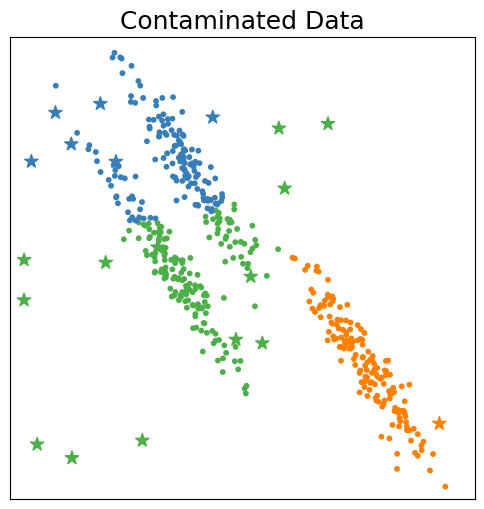

In [539]:
plt.figure(figsize=(6, 6))

colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                ]
            ),
            int(max(y_pred) + 1),
        )
    )
)
# Add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

# Plot the data points
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], s=10, color=colors[y_pred])

# Plot the outliers as stars
plt.scatter(X_noisy[outlier_indices, 0], X_noisy[outlier_indices, 1], marker='*', s=100, color=colors[y_pred[outlier_indices]])


plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())


plt.title("Contaminated Data", size=18)
p2 = plt.gcf()

plt.show()

In [540]:
from sklearn.neighbors import LocalOutlierFactor

# Create an instance of the LocalOutlierFactor class
lof = LocalOutlierFactor(n_neighbors=20)

# Fit the model and predict the outliers
outlier_mask = lof.fit_predict(X_noisy) == -1

# Remove the outliers from X_noisy
X_noisy_cleaned = X_noisy[~outlier_mask]




In [541]:
clusterer.fit(X_noisy_cleaned)

y_pred = clusterer.predict(X_noisy_cleaned)

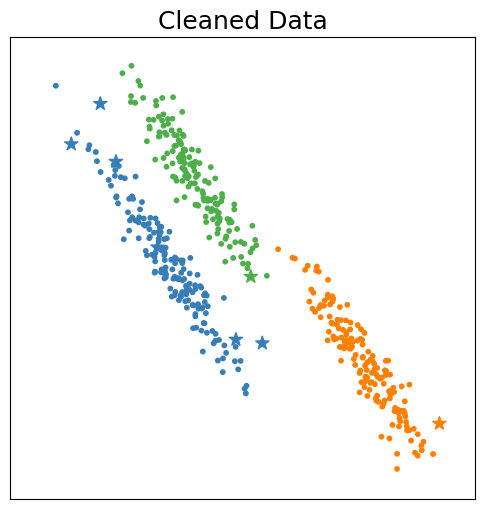

In [542]:
plt.figure(figsize=(6, 6))

colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#4daf4a",
                    "#ff7f00",
                    "#377eb8",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                ]
            ),
            int(max(y_pred) + 1),
        )
    )
)
# Add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

# Plot the data points
plt.scatter(X_noisy_cleaned[:, 0], X_noisy_cleaned[:, 1], s=10, color=colors[y_pred])

same_values_indices = np.where(np.isin(X_noisy_cleaned, X_noisy[outlier_indices]).all(axis=1))[0]

# Plot the outliers as stars
plt.scatter(X_noisy_cleaned[same_values_indices, 0], X_noisy_cleaned[same_values_indices, 1], marker='*', s=100, color=colors[y_pred[same_values_indices]])



plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())


plt.title("Cleaned Data", size=18)
p3 = plt.gcf()

plt.show()

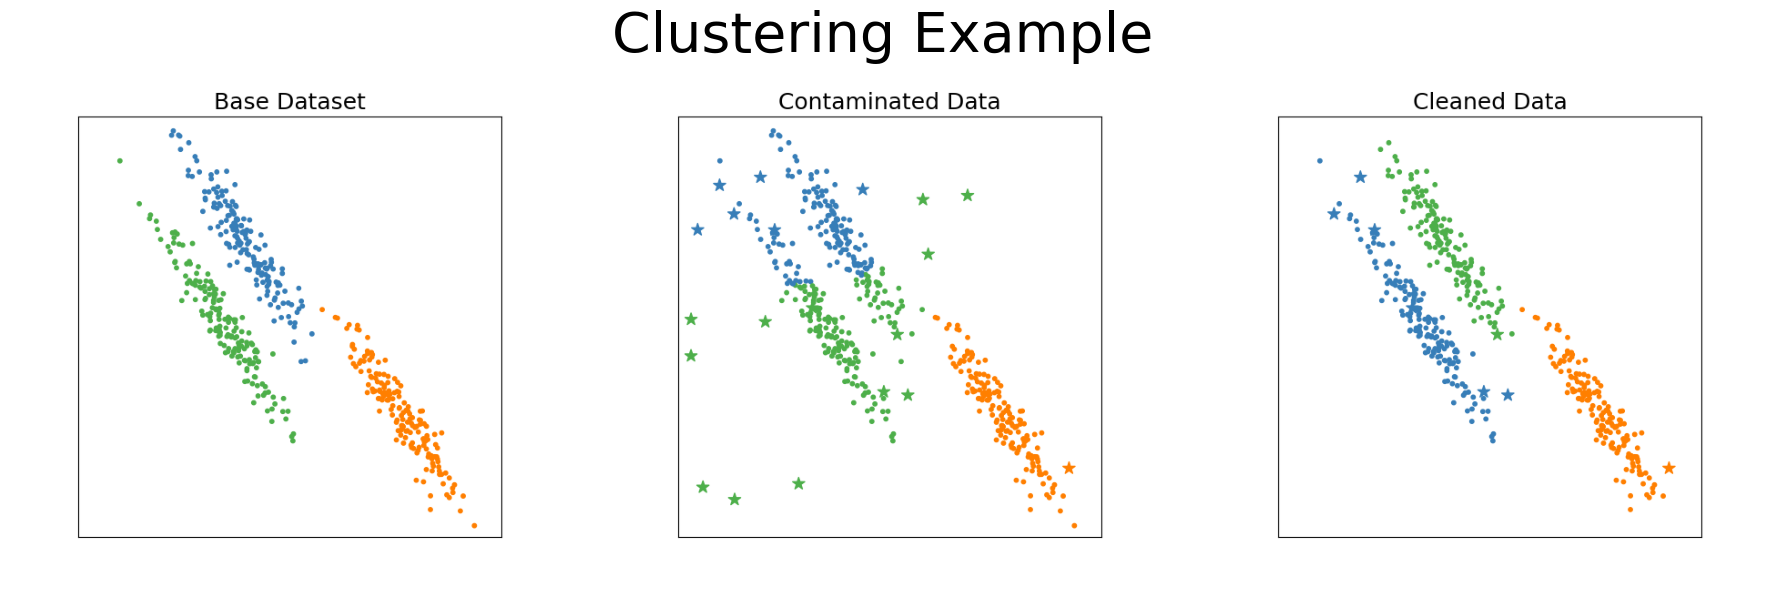

In [546]:
from io import BytesIO
import matplotlib.pyplot as plt

# Convert the figures to image buffers
buffer_p1 = BytesIO()
buffer_p2 = BytesIO()
buffer_p3 = BytesIO()

p1.savefig(buffer_p1, format='png')
p2.savefig(buffer_p2, format='png')
p3.savefig(buffer_p3, format='png')

buffer_p1.seek(0)
buffer_p2.seek(0)
buffer_p3.seek(0)

# Read the image data from the buffers
img_p1 = plt.imread(buffer_p1)
img_p2 = plt.imread(buffer_p2)
img_p3 = plt.imread(buffer_p3)

# Create a combined plot with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [3, 3, 3]})  # Adjust width ratios as needed

# Plot each image in a separate subplot
axes[0].imshow(img_p1)
axes[0].axis('off')

axes[1].imshow(img_p2)
axes[1].axis('off')

axes[2].imshow(img_p3)
axes[2].axis('off')

# Set a common title for all subplots
fig.suptitle('Clustering Example', fontsize=40)


# Adjust layout
fig.tight_layout(pad=0)

# Show the combined plot
plt.show()